In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
USArrests =pd.read_csv("USArrests.csv",index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
scaler = StandardScaler()

In [4]:
USArrests_scaled = scaler.fit_transform(USArrests)

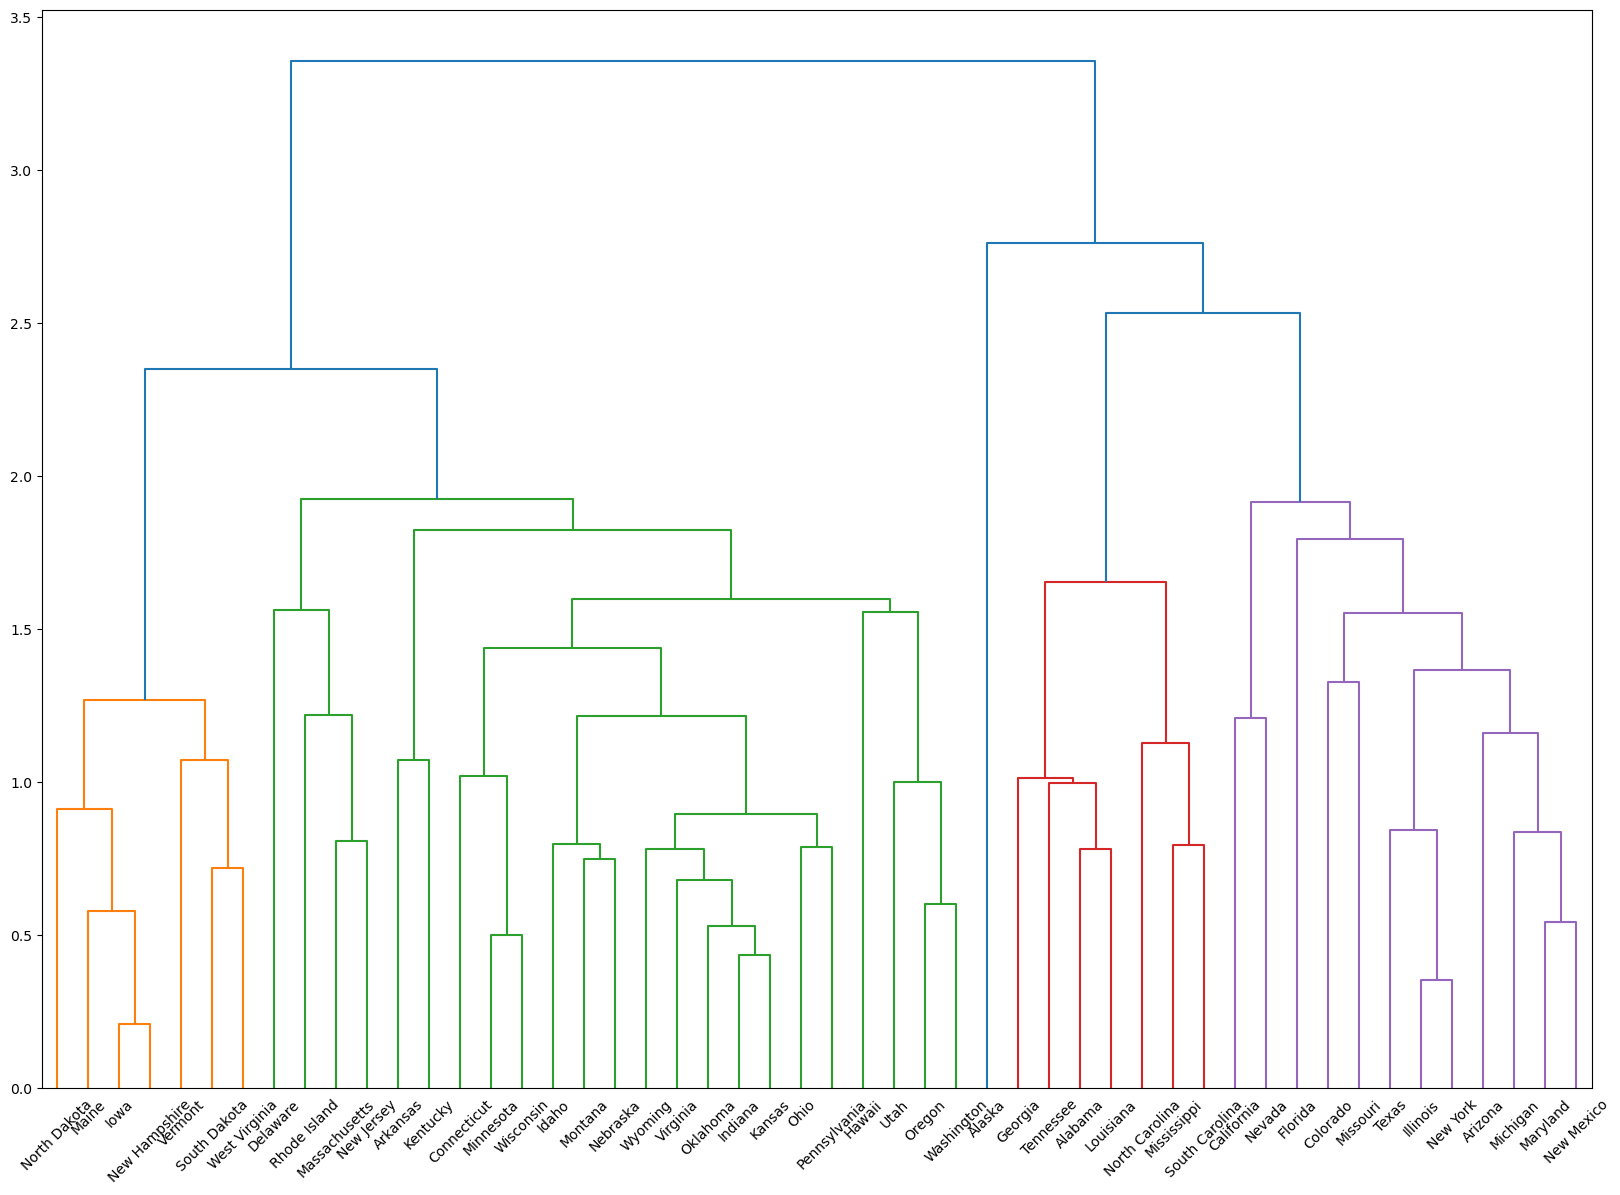

In [11]:
# calculating the linkages
merging = linkage(USArrests_scaled,method='average')
plt.figure(figsize=(20,14))
dendrogram(merging,labels=list(USArrests.index),leaf_rotation=45,leaf_font_size=10)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [14]:
clustering = AgglomerativeClustering(n_clusters=4,
                                 linkage='average')
pipe = Pipeline([('SCL',scaler),('CULT',clustering)])
pipe.fit(USArrests)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CULT',
                 AgglomerativeClustering(linkage='average', n_clusters=4))])

In [15]:
print("Clustering label",clustering.labels_)
print("silhoute score",silhouette_score(USArrests_scaled,clustering.labels_))
print("silhoute score",silhouette_score(USArrests,clustering.labels_))

Clustering label [3 2 1 0 1 1 0 0 1 3 0 0 1 0 0 0 0 3 0 1 0 1 0 3 1 0 0 1 0 0 1 1 3 0 0 0 0
 0 0 3 0 3 1 0 0 0 0 0 0 0]
silhoute score 0.3636819420151221
silhoute score 0.2529090053099124
